# 11 Exercise - Saving and Loading Data

In this final exercise set, we are going to go through how to save and load data. Since this is a final exercise set we will use several things that we learned previously in the course. We will use the "Boston dataset" containing information about houses sold in the Boston area. Below is a description of the columns and rows of the dataset.

## Boston House Prices Dataset
<b>Data Set Characteristics:</b>

 - Number of Instances (Rows): 506
 - Number of Attributes (Columns): 14
 - Attribute Information (in order):  
  - Column 00 - Per capita crime rate by town
  - Column 01 - Proportion of residential land zoned for lots over 25,000 sq.ft.
  - Column 02 - Proportion of non-retail business acres per town
  - Column 03 - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
  - Column 04 - Nitric oxides concentration (parts per 10 million)
  - Column 05 - Average number of rooms per dwelling
  - Column 06 - Proportion of owner-occupied units built prior to 1940
  - Column 07 - Weighted distances to five Boston employment centers
  - Column 08 - Index of accessibility to radial highways
  - Column 09 - Full-value property-tax rate per \\$10,000
  - Column 10 - Pupil-teacher ratio by town
  - Column 11 - $1000(Bk - 0.63)^2$ where $Bk$ is the proportion of blacks by town
  - Column 12 - Lower status percentage of the population
  - Column 13 - Median value of owner-occupied homes in \\$1000's
        
 - Missing Attribute Values: None  
 - Creator: Harrison, D. and Rubinfeld, D.L.
    
----------------------------

This is a copy of UCI ML housing dataset.

https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.
This particular version of the dataset is taken from the package sklearn.

## Exercise 1: Import the Packages

In [1]:
# Import NumPy and MatPlotLib
import numpy as np
from matplotlib import pyplot as plt

## Exercise 2: Read in the File

Let us now read in the Boston dataset from a file.

In [3]:
# Read in the boston.csv file as a NumPy array. Call the variable "boston".
boston = np.loadtxt('./data/raw/boston.csv', delimiter=',')

# HINT: You should specify that delimiter=",".

# Find the shape of the dataset.
boston.shape

(506, 14)

Try to print out the Boston dataset. What happens to the printed object? Why do you think this happens?

In [4]:
# Print out the dataset
boston

array([[6.3000e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7300e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7300e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0800e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0960e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7400e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]])

## Exercise 3: Plotting the Rooms

Plot a histogram using the average number of rooms (column 5). Are there any houses with an average over 10 rooms?

In [13]:
# Plot a histogram using the average number of rooms.
print('Average', boston[:, 5].mean())
print('Any house with average over 10', (boston[:, 5] > 10).any())

Average 6.284634387351779
Any house with average over 10 False


Plot the price of the houses (column 13) as a histogram. Where is the peak (also called the mode) of the histogram?

Text(0, 0.5, 'Count')

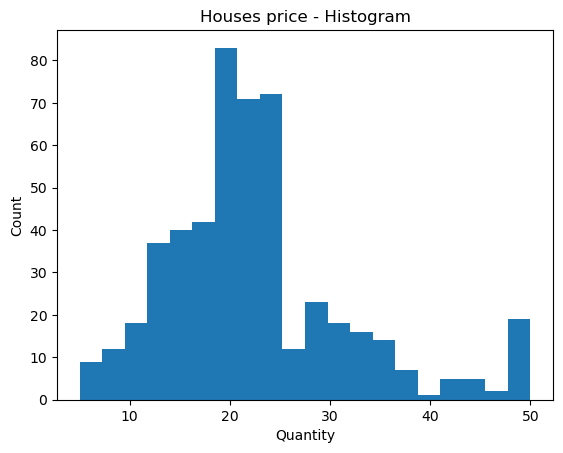

In [18]:
# Plot the price of the houses as a histogram.
plt.hist(boston[:, 13], bins=20)
plt.title('Houses price - Histogram')
plt.xlabel('Quantity')
plt.ylabel('Count')

Create a scatter plot over number of rooms (column 5) and the house price (column 13). Can you see a trend?

Text(0, 0.5, 'Price')

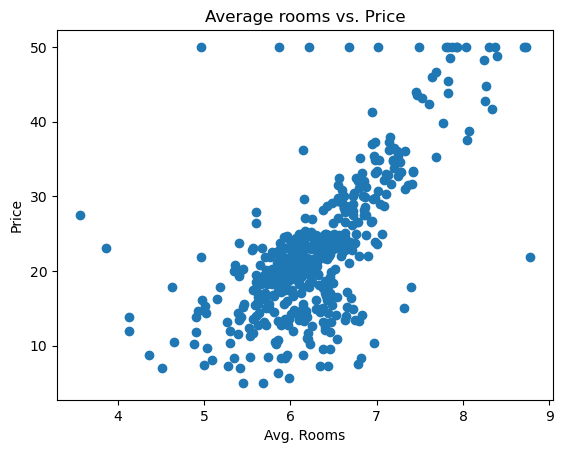

In [21]:
# Create a scatter plot over number of rooms and the house price.
plt.scatter(boston[:, 5],
            boston[:, 13])
plt.title('Average rooms vs. Price')
plt.xlabel('Avg. Rooms')
plt.ylabel('Price')

## Exercise 4: Count Riverside Houses

The third column in the dataset is represented by what is called a <b>dummy variable</b>. This is when one represents different categories with numbers. In our case, the two categories are represented by

- House by the riverside - 1
- House not by the riverside - 0

In [24]:
# Use NumPy to figure out how many of the houses is by the river (column 3).
print('How many houses by the river?', (boston[:, 3] == 1).sum())

How many houses by the river? 35


In [30]:
# How many percent of the total houses sold was by the river?
print('How many percent of the total houses sold was by the river?',
      ((boston[:, 3] == 1).sum() / boston.shape[0]) * 100)

How many percent of the total houses sold was by the river? 6.91699604743083


## Exercise 5: Averages, min, and max.

In [43]:
# What is the average, min, and max in each column?
for func in ['mean', 'min', 'max']:
    print(f'Boston {func.upper()}\n', 
          getattr(boston, func)(axis=0),
          end='\n\n')

Boston MEAN
 [3.61352510e+00 1.13636364e+01 1.11367787e+01 6.91699605e-02
 5.54695059e-01 6.28463439e+00 6.85749012e+01 3.79504269e+00
 9.54940711e+00 4.08237154e+02 1.84555336e+01 3.56674032e+02
 1.26530632e+01 2.25328063e+01]

Boston MIN
 [6.3000e-03 0.0000e+00 4.6000e-01 0.0000e+00 3.8500e-01 3.5610e+00
 2.9000e+00 1.1296e+00 1.0000e+00 1.8700e+02 1.2600e+01 3.2000e-01
 1.7300e+00 5.0000e+00]

Boston MAX
 [ 88.9762 100.      27.74     1.       0.871    8.78   100.      12.1265
  24.     711.      22.     396.9     37.97    50.    ]



In [45]:
# In particular, what is the average, max, and min price (column 13) in dollars of the houses?
for func in ['mean', 'max', 'min']:
    print(f'Boston {func} price',
          getattr(boston[:, 13], func)())

Boston mean price 22.532806324110677
Boston max price 50.0
Boston min price 5.0


## Exercise 6: Cheap Housing

Let us say that a cheap house is a house that costs less than \\$10 000. Below you will find out how many cheap houses that are in the Boston area.

In [51]:
# Find the number of cheap houses.
print('Cheap houses', (boston[:, 13] < 10).sum())

Cheap houses 24


Does the cheap houses have a higher crime rate (column 0) than an average priced house? Let us say that the average priced houses has a price between \\$15 000 and \\$30 000.

In [69]:
# Find the mean crime rate for cheap houses
print('Mean crime rate', boston[boston[:, 13] < 10, 0].mean())

# Find the mean crime rate for average priced houses
print('Mean crime rate for 15K-30K houses', 
      boston[(boston[:, 13] > 15) & (boston[:, 13] < 30)].mean())

# Compare the two numbers


Mean crime rate 22.059316666666664
Mean crime rate for 15K-30K houses 64.92178894505494


## Exercise 7: Save the Data

Now is the time to save the data for later. We are only interested in the columns 0, 3, 5, and 13, so we will only save those.

In [26]:
# Define a new array called short_boston with the columns 0, 3, 5, 13 from the boston array.
short_boston = np.array(boston[:, [0, 3, 5, 13]])

# Save the array short_boston as a numpy object for later.
np.save('./data/interim/short_boston', short_boston)

In [28]:
np.load('./data/interim/short_boston.npy').shape

(506, 4)

## Moral of the Story

Rather than typing in NumPy arrays by hand, it is more common in practice to load data from an external file. We have seen that the file can be a text file, a csv file, or a NumPy file. When one is finished working with the data, then one can save the data into the appropriate format for later use. A great place to find more data to play around with is the site Kaggle: https://www.kaggle.com/